[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/saifulislamdev/artificial-intelligence/blob/main/example_notebook.ipynb)

<center><h1>Different Types of Interpolation</h1></center>
<center>Saiful Islam</center>

## Abstract

The following code was a part of my final project for CSC 30100 Numerical Issues in Scientific Programming back in Spring 2021.

This code performs multiple interpolation methods with two different datasets (`points` and `more_points`) to estimate the value of sin(x) at different values of x. By using two different datasets, I wanted to show how including more data in a dataset yields better approximations. However, the main focus was to show the tradeoffs between the methods. Overall, it was shown that Piecewise Linear Approximation had low time and space complexities, but the other interpolation methods had more accurate approximations. My take was that Piecewise Linear Approximation was my favorite among the methods, and more points should be included in datasets (especially for PLA) to have more accurate approximations.

## Setup and Imports

In order to run this notebook locally you will need to make sure the following modules are installed on your machine:
* `matplotlib` 
* `numpy`

In [1]:
# importing modules

import math
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
# initializing datasets and "actual" values of sin(x)

sin_45 = math.sqrt(2)/2
sin_60 = math.sqrt(3)/2
points = [[0, 0], [90, 1], [180, 0], [270, -1]]
more_points = [[0, 0], [30, 0.5], [60, sin_60], [90, 1], [120, sin_60], [150, 0.5], [180, 0], [210, -0.5], [240, -sin_60], [270, -1]]
actual = [[x, math.sin(math.radians(x))] for x in range(0, points[len(points) - 1][0] + 1, 10)]

## Piecewise Linear Approximation

Piecewise Linear Approximation is essentially generating a series of lines between consecutive point to help us estimate; pretty simple. However, not the most accurate as most functions are not linear. To increase accurateness, have large datasets.

Piecewise Linear Approximation with Fewer Points

   x     Approximation            math.sin             Error w/ math.sin         Time Spent (s)
   0  0.00000000000000000  0.00000000000000000e+00  0.00000000000000000e+00  4.76837158203125000e-06
  10  0.11111111111111112  1.73648177666930331e-01  6.25370665558192124e-02  3.81469726562500000e-06
  20  0.22222222222222224  3.42020143325668713e-01  1.19797921103446475e-01  5.00679016113281250e-06
  30  0.33333333333333337  4.99999999999999944e-01  1.66666666666666574e-01  3.09944152832031250e-06
  40  0.44444444444444448  6.42787609686539252e-01  1.98343165242094777e-01  4.76837158203125000e-06
  50  0.55555555555555558  7.66044443118978013e-01  2.10488887563422433e-01  3.09944152832031250e-06
  60  0.66666666666666674  8.66025403784438597e-01  1.99358737117771856e-01  2.14576721191406250e-06
  70  0.77777777777777779  9.39692620785908317e-01  1.61914843008130527e-01  3.81469726562500000e-06
  80  0.88888888888888895  9.84807753012208020

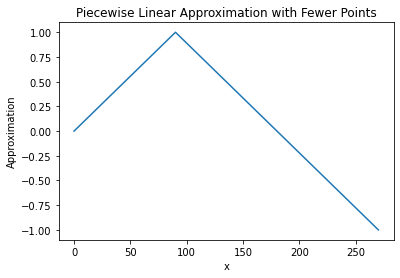



Piecewise Linear Approximation with More Points

   x     Approximation            math.sin             Error w/ math.sin         Time Spent (s)
   0  0.00000000000000000  0.00000000000000000e+00  0.00000000000000000e+00  3.09944152832031250e-06
  10  0.16666666666666666  1.73648177666930331e-01  6.98151100026367377e-03  3.09944152832031250e-06
  20  0.33333333333333331  3.42020143325668713e-01  8.68680999233539808e-03  2.86102294921875000e-06
  30  0.50000000000000000  4.99999999999999944e-01  5.55111512312578270e-17  1.90734863281250000e-06
  40  0.62200846792814624  6.42787609686539252e-01  2.07791417583930160e-02  1.90734863281250000e-06
  50  0.74401693585629236  7.66044443118978013e-01  2.20275072626856527e-02  3.09944152832031250e-06
  60  0.86602540378443860  8.66025403784438597e-01  0.00000000000000000e+00  4.05311584472656250e-06
  70  0.91068360252295910  9.39692620785908317e-01  2.90090182629492155e-02  2.86102294921875000e-06
  80  0.95534180126147950  9.8480775301220802

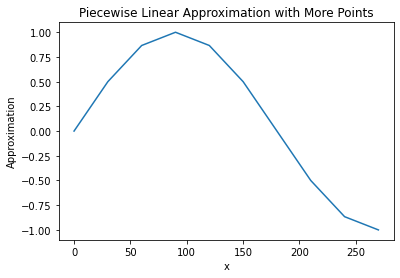

In [3]:
# https://www.geeksforgeeks.org/how-to-implement-linear-interpolation-in-python/

def piecewise_linear_approximation(x, points):
    next_point = 0
    while next_point < len(points) and x > points[next_point][0]: # finding next point after (x, approx) in the given points
        next_point += 1
    previous_point = next_point - 1 # previous point before (x, approx) in the given points
    x1 = points[previous_point][0]
    y1 = points[previous_point][1]
    x2 = points[next_point][0]
    y2 = points[next_point][1]
    m = (y2 - y1) / (x2 - x1) # slope of line between prev point and next point
    approx = m * (x - x1) + y1 # using tangent line equation: y - y_1 = m(x - x_1)
    return approx

def evaluating_pla(points, fewer_or_more):
    last_deg = points[len(points) - 1][0]
    actual_ptr = 0
    x_plot = []
    y_plot = []
    print('% 4s' % 'x', '% 17s' % 'Approximation', '% 19s' % 'math.sin', '% 29s' % 'Error w/ math.sin', '% 22s' % 'Time Spent (s)')
    for x in range(0, last_deg + 1, 10):
        start_time = time.time()
        approx = piecewise_linear_approximation(x, points)
        end_time = time.time()
        time_spent = end_time - start_time
        built_in = actual[actual_ptr][1]
        abs_err = abs(approx - built_in)
        print('% 4d' % x, '% .17f' % approx, '% .17e' % built_in, '% .17e' % abs_err, '% .17e' % time_spent)
        x_plot.append(x)
        y_plot.append(approx)
        actual_ptr += 1
    plt.plot(x_plot, y_plot)
    plt.title('Piecewise Linear Approximation with ' + fewer_or_more)
    plt.xlabel('x')
    plt.ylabel('Approximation')
    plt.show()

print('Piecewise Linear Approximation with Fewer Points\n')
evaluating_pla(points, 'Fewer Points')
print('\n\nPiecewise Linear Approximation with More Points\n')
evaluating_pla(more_points, 'More Points')


## Lagrange Interpolation

Lagrange Interpolation is a polynomial interpolation technique. It runs in O(n<sup>2</sup>) where n is the number of points provided in the dataset.

Lagrange Interpolation with Fewer Points

   x     Approximation            math.sin             Error w/ math.sin         Time Spent (s)
   0  0.00000000000000000  0.00000000000000000e+00  0.00000000000000000e+00  1.09672546386718750e-05
  10  0.27206218564243256  1.73648177666930331e-01  9.84140079755022323e-02  9.05990600585937500e-06
  20  0.49748513946044803  3.42020143325668713e-01  1.55464996134779321e-01  1.09672546386718750e-05
  30  0.67901234567901225  4.99999999999999944e-01  1.79012345679012308e-01  9.05990600585937500e-06
  40  0.81938728852309084  6.42787609686539252e-01  1.76599678836551588e-01  1.00135803222656250e-05
  50  0.92135345221764986  7.66044443118978013e-01  1.55309009098671846e-01  6.91413879394531250e-06
  60  0.98765432098765427  8.66025403784438597e-01  1.21628917203215670e-01  6.19888305664062500e-06
  70  1.02103337905807057  9.39692620785908317e-01  8.13407582721622502e-02  2.71797180175781250e-05
  80  1.02423411065386372  9.84807753012208020e-01  3.

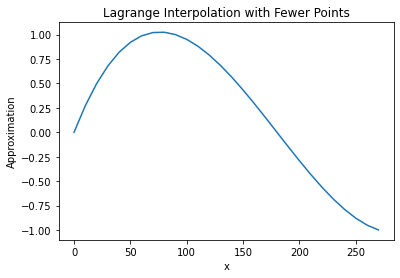



Lagrange Interpolation with More Points

   x     Approximation            math.sin             Error w/ math.sin         Time Spent (s)
   0  0.00000000000000000  0.00000000000000000e+00  0.00000000000000000e+00  3.52859497070312500e-05
  10  0.17363455999487401  1.73648177666930331e-01  1.36176720563208065e-05  4.72068786621093750e-05
  20  0.34201357938938942  3.42020143325668713e-01  6.56393627929130474e-06  5.10215759277343750e-05
  30  0.50000000000000000  4.99999999999999944e-01  5.55111512312578270e-17  2.78949737548828125e-05
  40  0.64278965070239602  6.42787609686539252e-01  2.04101585676852437e-06  2.78949737548828125e-05
  50  0.76604571969136337  7.66044443118978013e-01  1.27657238535583417e-06  2.78949737548828125e-05
  60  0.86602540378443860  8.66025403784438597e-01  0.00000000000000000e+00  2.88486480712890625e-05
  70  0.93969201903508881  9.39692620785908317e-01  6.01750819506641221e-07  3.12328338623046875e-05
  80  0.98480730419715912  9.84807753012208020e-01  4

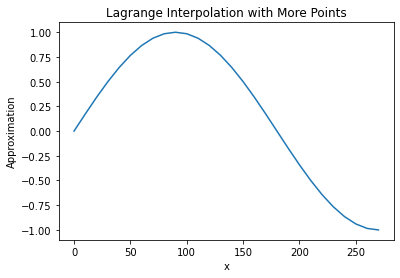

In [4]:
# https://www.geeksforgeeks.org/lagranges-interpolation/

def lagrange_interpolation(x, points):
    approx = 0.0
    n = len(points)
    for i in range(n):
        term = points[i][1]
        for j in range(n):
            if j != i:
                term *= (x - points[j][0])/(points[i][0] - points[j][0])
        approx += term
    return approx

def evaluating_li(points, fewer_or_more):
    last_deg = points[len(points) - 1][0]
    actual_ptr = 0
    x_plot = []
    y_plot = []
    print('% 4s' % 'x', '% 17s' % 'Approximation', '% 19s' % 'math.sin', '% 29s' % 'Error w/ math.sin', '% 22s' % 'Time Spent (s)')
    for x in range(0, last_deg + 1, 10):
        start_time = time.time()
        approx = lagrange_interpolation(x, points)
        end_time = time.time()
        time_spent = end_time - start_time
        built_in = actual[actual_ptr][1]
        abs_err = abs(approx - built_in)
        print('% 4d' % x, '% .17f' % approx, '% .17e' % built_in, '% .17e' % abs_err, '% .17e' % time_spent)
        x_plot.append(x)
        y_plot.append(approx)
        actual_ptr += 1
    plt.plot(x_plot, y_plot)
    plt.title('Lagrange Interpolation with ' + fewer_or_more)
    plt.xlabel('x')
    plt.ylabel('Approximation')
    plt.show()

print('Lagrange Interpolation with Fewer Points\n')
evaluating_li(points, 'Fewer Points')
print('\n\nLagrange Interpolation with More Points\n')
evaluating_li(more_points, 'More Points')

## Newton’s Divided-Difference Interpolation

Newton's Divided-Difference Interpolation is a different approach than Lagrange but yields the same approximations. The disadvantage with this method is that there are high time and space complexities.

Newton’s Divided Difference Interpolation with Fewer Points

   x     Approximation            math.sin             Error w/ math.sin         Time Spent (s)
   0  0.00000000000000000  0.00000000000000000e+00  0.00000000000000000e+00  2.09808349609375000e-05
  10  0.27206218564243256  1.73648177666930331e-01  9.84140079755022323e-02  2.31266021728515625e-05
  20  0.49748513946044809  3.42020143325668713e-01  1.55464996134779376e-01  1.52587890625000000e-05
  30  0.67901234567901236  4.99999999999999944e-01  1.79012345679012419e-01  1.50203704833984375e-05
  40  0.81938728852309106  6.42787609686539252e-01  1.76599678836551810e-01  1.50203704833984375e-05
  50  0.92135345221764975  7.66044443118978013e-01  1.55309009098671735e-01  1.50203704833984375e-05
  60  0.98765432098765438  8.66025403784438597e-01  1.21628917203215781e-01  2.90870666503906250e-05
  70  1.02103337905807035  9.39692620785908317e-01  8.13407582721620281e-02  2.28881835937500000e-05
  80  1.02423411065386372  9.848077

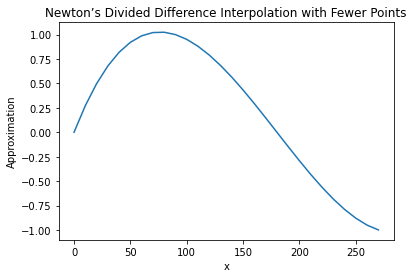



Newton’s Divided Difference Interpolation with More Points

   x     Approximation            math.sin             Error w/ math.sin         Time Spent (s)
   0  0.00000000000000000  0.00000000000000000e+00  0.00000000000000000e+00  5.29289245605468750e-05
  10  0.17363455999487365  1.73648177666930331e-01  1.36176720566816289e-05  4.41074371337890625e-05
  20  0.34201357938938964  3.42020143325668713e-01  6.56393627906926014e-06  4.22000885009765625e-05
  30  0.50000000000000000  4.99999999999999944e-01  5.55111512312578270e-17  3.98159027099609375e-05
  40  0.64278965070239569  6.42787609686539252e-01  2.04101585643545747e-06  3.98159027099609375e-05
  50  0.76604571969136348  7.66044443118978013e-01  1.27657238546685647e-06  3.91006469726562500e-05
  60  0.86602540378443860  8.66025403784438597e-01  0.00000000000000000e+00  3.98159027099609375e-05
  70  0.93969201903508870  9.39692620785908317e-01  6.01750819617663524e-07  3.81469726562500000e-05
  80  0.98480730419715889  9.84807

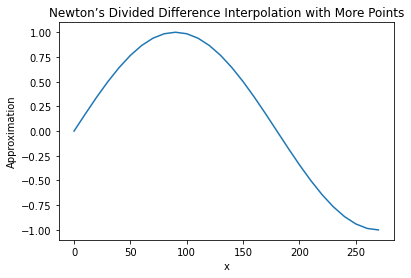

In [5]:
# https://www.geeksforgeeks.org/newtons-divided-difference-interpolation-formula/

# Function to find the product term 
def product_term(i, value, x): 
    prod = 1
    for j in range(i): 
        prod *= value - x[j]
    return prod
  
# Function for calculating divided difference table 
def divided_difference_table(x, y, n):
    for i in range(1, n): 
        for j in range(n - i): 
            y[j][i] = ((y[j][i - 1] - y[j + 1][i - 1]) / (x[j] - x[i + j]))
    return y
  
# Function for applying Newton's Divided Difference formula 
def apply_formula(value, x, y, n): 
    sum = y[0][0]
    for i in range(1, n):
        sum += product_term(i, value, x) * y[0][i]
    return sum

def ndd_interpolation(x, points):
    n = len(points)
    y = [[0 for j in range(n)] for i in range(n)]
    for k in range(len(y)):
        y[k][0] = points[k][1] 
    y = divided_difference_table([i[0] for i in points], y, n)
    approx = apply_formula(x, [i[0] for i in points], y, n)
    return approx

def evaluating_ndd(points, fewer_or_more):
    last_deg = points[len(points) - 1][0]
    actual_ptr = 0
    x_plot = []
    y_plot = []
    print('% 4s' % 'x', '% 17s' % 'Approximation', '% 19s' % 'math.sin', '% 29s' % 'Error w/ math.sin', '% 22s' % 'Time Spent (s)')
    for x in range(0, last_deg + 1, 10):
        start_time = time.time()
        approx = ndd_interpolation(x, points)
        end_time = time.time()
        time_spent = end_time - start_time
        built_in = actual[actual_ptr][1]
        abs_err = abs(approx - built_in)
        print('% 4d' % x, '% .17f' % approx, '% .17e' % built_in, '% .17e' % abs_err, '% .17e' % time_spent)
        x_plot.append(x)
        y_plot.append(approx)
        actual_ptr += 1
    plt.plot(x_plot, y_plot)
    plt.title('Newton’s Divided Difference Interpolation with ' + fewer_or_more)
    plt.xlabel('x')
    plt.ylabel('Approximation')
    plt.show()

print('Newton’s Divided Difference Interpolation with Fewer Points\n')
evaluating_ndd(points, 'Fewer Points')
print('\n\nNewton’s Divided Difference Interpolation with More Points\n')
evaluating_ndd(more_points, 'More Points')

## Newton Forward-Difference Interpolation

Similar to Newton's Divided-Difference Interpolation, Newton's Forward-Difference Interpolation has high time and space complexities as well.

Newton’s Forward Difference Interpolation with Fewer Points

   x     Approximation            math.sin             Error w/ math.sin         Time Spent (s)
   0  0.00000000000000000  0.00000000000000000e+00  0.00000000000000000e+00  2.00271606445312500e-05
  10  0.27206218564243256  1.73648177666930331e-01  9.84140079755022323e-02  1.97887420654296875e-05
  20  0.49748513946044809  3.42020143325668713e-01  1.55464996134779376e-01  1.69277191162109375e-05
  30  0.67901234567901236  4.99999999999999944e-01  1.79012345679012419e-01  1.38282775878906250e-05
  40  0.81938728852309095  6.42787609686539252e-01  1.76599678836551699e-01  1.59740447998046875e-05
  50  0.92135345221764975  7.66044443118978013e-01  1.55309009098671735e-01  1.31130218505859375e-05
  60  0.98765432098765427  8.66025403784438597e-01  1.21628917203215670e-01  1.21593475341796875e-05
  70  1.02103337905807035  9.39692620785908317e-01  8.13407582721620281e-02  9.77516174316406250e-06
  80  1.02423411065386372  9.848077

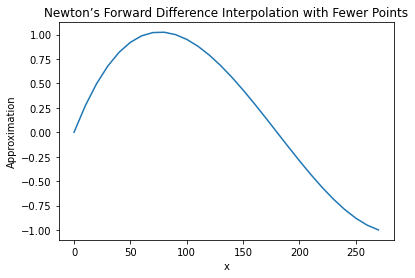



Newton’s Forward Difference Interpolation with More Points

   x     Approximation            math.sin             Error w/ math.sin         Time Spent (s)
   0  0.00000000000000000  0.00000000000000000e+00  0.00000000000000000e+00  4.98294830322265625e-05
  10  0.17363455999487359  1.73648177666930331e-01  1.36176720567371401e-05  6.60419464111328125e-05
  20  0.34201357938938964  3.42020143325668713e-01  6.56393627906926014e-06  4.72068786621093750e-05
  30  0.50000000000000000  4.99999999999999944e-01  5.55111512312578270e-17  3.09944152832031250e-05
  40  0.64278965070239569  6.42787609686539252e-01  2.04101585643545747e-06  3.09944152832031250e-05
  50  0.76604571969136348  7.66044443118978013e-01  1.27657238546685647e-06  3.19480895996093750e-05
  60  0.86602540378443860  8.66025403784438597e-01  0.00000000000000000e+00  3.00407409667968750e-05
  70  0.93969201903508870  9.39692620785908317e-01  6.01750819617663524e-07  3.19480895996093750e-05
  80  0.98480730419715889  9.84807

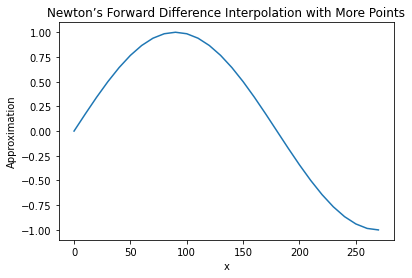

In [6]:
# https://www.geeksforgeeks.org/newton-forward-backward-interpolation/
  
# calculating u mentioned in the formula
def u_calculation(u, n):
    calc = u
    for i in range(1, n):
        calc *= (u - i)
    return calc
    
def nfd_interpolation(value, points):
    n = len(points)
    x = [i[0] for i in points]
    y = [[0 for j in range(n)] for i in range(n)]
    for k in range(len(y)):
        y[k][0] = points[k][1]
    # Calculating the forward difference table
    for i in range(1, n):
        for j in range(n - i):
            y[j][i] = y[j + 1][i - 1] - y[j][i - 1]
    # Getting approximation
    approx = y[0][0]
    u = (value - x[0]) / (x[1] - x[0])
    for i in range(1,n):
        approx += (u_calculation(u, i) * y[0][i]) / math.factorial(i)
    return approx

def evaluating_nfd(points, fewer_or_more):
    last_deg = points[len(points) - 1][0]
    actual_ptr = 0
    x_plot = []
    y_plot = []
    print('% 4s' % 'x', '% 17s' % 'Approximation', '% 19s' % 'math.sin', '% 29s' % 'Error w/ math.sin', '% 22s' % 'Time Spent (s)')
    for x in range(0, last_deg + 1, 10):
        start_time = time.time()
        approx = nfd_interpolation(x, points)
        end_time = time.time()
        time_spent = end_time - start_time
        built_in = actual[actual_ptr][1]
        abs_err = abs(approx - built_in)
        print('% 4d' % x, '% .17f' % approx, '% .17e' % built_in, '% .17e' % abs_err, '% .17e' % time_spent)
        x_plot.append(x)
        y_plot.append(approx)
        actual_ptr += 1
    plt.plot(x_plot, y_plot)
    plt.title('Newton’s Forward Difference Interpolation with ' + fewer_or_more)
    plt.xlabel('x')
    plt.ylabel('Approximation')
    plt.show()
  
print('Newton’s Forward Difference Interpolation with Fewer Points\n')
evaluating_nfd(points, 'Fewer Points')
print('\n\nNewton’s Forward Difference Interpolation with More Points\n')
evaluating_nfd(more_points, 'More Points')

## AI Meme

<center>
    <img 
        src="https://img-9gag-fun.9cache.com/photo/aeAznm5_700bwp.webp" 
        alt="Artificial Intelligence meme"
    />
</center>

## Conclusions

Piecewise Linear Approximation is my favorite among the methods as it is fast, easy to implement, and comprehensible. Also, as shown, more points should be included in datasets (especially for PLA) to have more accurate approximations. 

I like PLA and you should, too!